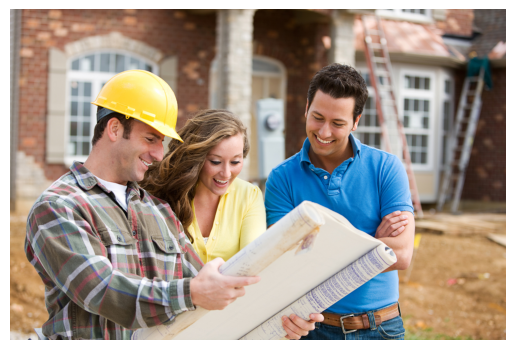

In [6]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = 'examples/shutterstock_170475800.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

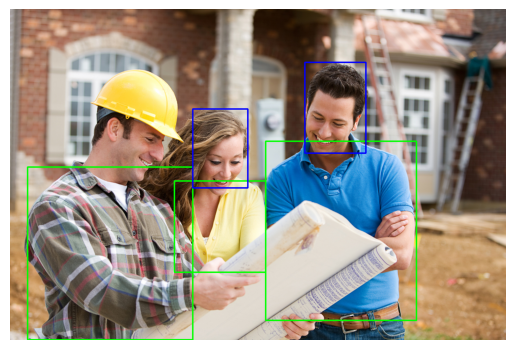

In [7]:
import cv2
import matplotlib.pyplot as plt

def draw_bboxes(image, bboxes, classes, confidences=None, yolo_format: bool = True):
    """
    Draws bounding boxes on the image, each with a color corresponding to its class, and plots confidence values.

    Parameters:
    image (numpy array): The image on which to draw the bounding boxes.
    bboxes (list): A list of bounding boxes in YOLO format (center_x, center_y, width, height).
    classes (list): A list of class indices to which the bounding boxes belong.
    confidences (list): A list of confidence values corresponding to the bounding boxes.
    """
    # Define a palette of colors for different classes
    colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # Example: Blue, Green, Red

    # Get the image dimensions
    height, width = image.shape[:2]

    # Ensure confidences is not None
    if confidences is None:
        confidences = [None] * len(bboxes)

    for bbox, cls, conf in zip(bboxes, classes, confidences):
        # Convert YOLO format (center_x, center_y, width, height) to (x1, y1, x2, y2)
        if yolo_format:
            center_x, center_y, w, h = bbox
            x1 = int((center_x - w / 2) * width)
            y1 = int((center_y - h / 2) * height)
            x2 = int((center_x + w / 2) * width)
            y2 = int((center_y + h / 2) * height)
        else:
            x1, y1, x2, y2 = bbox

        # Get color for the class
        color = colors[cls % len(colors)]

        # Draw rectangle on the image with the color corresponding to the class
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Plot confidence value near the bounding box
        if conf is not None:
            cv2.putText(image, f"{conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Assuming `image_rgb` is already loaded as RGB image
# Example: image_rgb = cv2.cvtColor(cv2.imread('path_to_your_image.jpg'), cv2.COLOR_BGR2RGB)

bboxes = [
    [515, 266, 819, 627],
    [331, 346, 515, 530],
    [594, 107, 717, 290],
    [35, 318, 368, 666],
    [368, 201, 479, 360]
]

classes = [1, 1, 0, 1, 0]

# Draw bounding boxes on the image
image_with_bboxes = draw_bboxes(image_rgb, bboxes, classes, yolo_format=False)

# Display the image with bounding boxes
plt.imshow(image_with_bboxes)
plt.axis('off')  # Hide the axis
plt.show()
